<a href="https://colab.research.google.com/github/akhilesh146/Object_Detection_ResNet50/blob/main/Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#dataset api
!kaggle competitions download -c cifar-10

 99% 711M/715M [00:06<00:00, 128MB/s]
100% 715M/715M [00:06<00:00, 114MB/s]


In [5]:
!ls


cifar-10.zip  kaggle.json  sample_data


In [6]:
#extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The Dataset is Extracted')

The Dataset is Extracted


In [7]:
!ls


cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [8]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 32.8 MB/s eta 0:00:00


In [10]:
import py7zr

archieve = py7zr.SevenZipFile('/content/train.7z', mode='r')
archieve.extractall()
archieve.close()

In [11]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Dependencies

In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split

In [13]:
filename = os.listdir('/content/train')

In [17]:
len(filename)

50000

Labels Processing

In [18]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [20]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [21]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [23]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [25]:
labels[0:5]

[6, 9, 9, 4, 1]

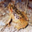

In [28]:
#displaying the sample image
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/train/7796.png')
cv2_imshow(image)

In [32]:
id_list = list(labels_df['id'])
id_list[0:5]

[1, 2, 3, 4, 5]

Image Processing

In [33]:
# convert images to numpy arrays
train_data_folder = '/content/train/'
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [40]:
type(data)

list

In [34]:
len(data)

50000

In [35]:
type(data[0])

numpy.ndarray

In [36]:
data[0].shape

(32, 32, 3)

In [37]:
# convert imageslist and labels list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [39]:
type(X)

numpy.ndarray

Train Test Split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [43]:
# scaling the data
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [44]:
X_test_scaled

array([[[[0.99215686, 0.87843137, 0.71764706],
         [0.99215686, 0.88235294, 0.7254902 ],
         [0.99607843, 0.89411765, 0.73333333],
         ...,
         [1.        , 0.88627451, 0.72941176],
         [0.99607843, 0.88235294, 0.7254902 ],
         [0.99215686, 0.87843137, 0.72156863]],

        [[0.97647059, 0.8745098 , 0.71764706],
         [0.98039216, 0.87843137, 0.7254902 ],
         [0.98431373, 0.89019608, 0.74117647],
         ...,
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549],
         [0.98039216, 0.86666667, 0.71372549]],

        [[0.98039216, 0.88235294, 0.72941176],
         [0.98823529, 0.89411765, 0.74509804],
         [0.99607843, 0.90588235, 0.76078431],
         ...,
         [0.99215686, 0.8745098 , 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549]],

        ...,

        [[0.98431373, 0.87058824, 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706]

Building the Neural Network

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
num_of_classes = 10

# setting up the layers of Simple Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

# compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
#training the neural network
model.fit(X_train_scaled, Y_train,validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2350 - loss: 2.0911 - val_accuracy: 0.2950 - val_loss: 1.9140
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3215 - loss: 1.8789 - val_accuracy: 0.3400 - val_loss: 1.8245
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3507 - loss: 1.8131 - val_accuracy: 0.3573 - val_loss: 1.7830
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3534 - loss: 1.8026 - val_accuracy: 0.3602 - val_loss: 1.7752
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3603 - loss: 1.7920 - val_accuracy: 0.3582 - val_loss: 1.7795
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3573 - loss: 1.7860 - val_accuracy: 0.3655 - val_loss: 1.7707
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3684 - loss: 1.7717 - val_accuracy: 0.3570 - val_loss: 1.7863
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3715 - loss: 1.7727 - 

#Pretrained ResNet50


In [49]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization,Dropout
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [51]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [52]:
model = Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [57]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [58]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 459s 353ms/step - acc: 0.3285 - loss: 2.0431 - val_acc: 0.7063 - val_loss: 1.0302
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 393s 349ms/step - acc: 0.6573 - loss: 1.1096 - val_acc: 0.8813 - val_loss: 0.5013
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 356ms/step - acc: 0.7962 - loss: 0.7698 - val_acc: 0.9172 - val_loss: 0.3512
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 356ms/step - acc: 0.8612 - loss: 0.5897 - val_acc: 0.9323 - val_loss: 0.2890
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 348ms/step - acc: 0.9022 - loss: 0.4601 - val_acc: 0.9330 - val_loss: 0.2750
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 392s 348ms/step - acc: 0.9329 - loss: 0.3583 - val_acc: 0.9375 - val_loss: 0.2413
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 355ms/step - acc: 0.9506 - loss: 0.2923 - val_acc: 0.9420 - val_loss: 0.2252
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 356ms/step - acc: 0.9622 - loss: 0.2425 - val_acc: 0.9402 - val_loss: 0.2243
Epoch 9/

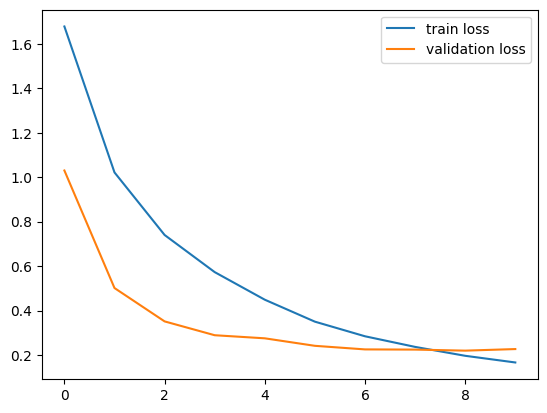

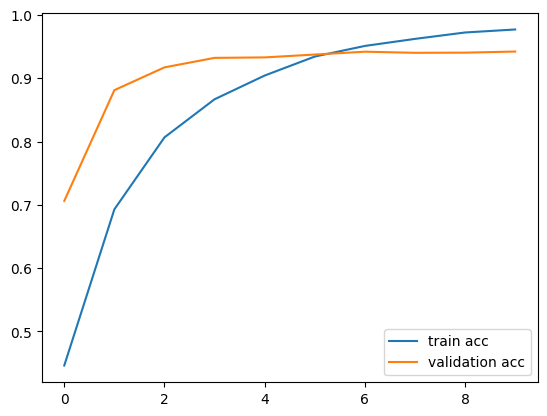

In [59]:
h = history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train acc')
plt.plot(h.history['val_acc'], label='validation acc')
plt.legend()
plt.show()

array([[[  0,  58,  47],
        [  0,  58,  47],
        [  0,  57,  46],
        ...,
        [ 80, 129, 127],
        [ 84, 133, 131],
        [ 87, 136, 134]],

       [[  0,  58,  47],
        [  0,  58,  47],
        [  0,  58,  47],
        ...,
        [ 80, 129, 127],
        [ 83, 132, 130],
        [ 86, 135, 133]],

       [[  2,  58,  47],
        [  2,  58,  47],
        [  2,  58,  47],
        ...,
        [ 78, 127, 125],
        [ 81, 130, 128],
        [ 84, 133, 131]],

       ...,

       [[  9,  37,  31],
        [  9,  37,  31],
        [  8,  39,  32],
        ...,
        [113, 164, 220],
        [113, 163, 221],
        [110, 163, 220]],

       [[  9,  37,  31],
        [  9,  37,  31],
        [  8,  39,  32],
        ...,
        [115, 166, 222],
        [115, 165, 223],
        [115, 165, 223]],

       [[  9,  37,  31],
        [  9,  37,  31],
        [  8,  39,  32],
        ...,
        [119, 168, 224],
        [117, 167, 225],
        [117, 167, 225]]], dtype=uint8)
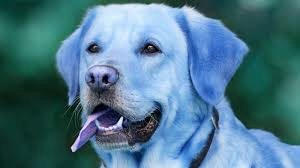

In [62]:
test_image = cv2.imread('/content/dog.png')
test_image

In [72]:
test_image = cv2.imread('/content/dog.png')  # Read the image
test_img = cv2.resize(test_image, (32, 32))  # Resize to 256x256
test_img = test_img.astype('float32') / 255.0  # Normalize to [0, 1]
test_input = np.expand_dims(test_img, axis=0)  # Add batch dimension (1, 256, 256, 3)


In [75]:
op = model.predict(test_input)
predicted_class = np.argmax(op)  # Get the class index with the highest probability
key = [k for k, v in labels_dictionary.items() if v == predicted_class][0]
print(f"Predicted Image is of : {key}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Image is of : dog
